<a href="https://colab.research.google.com/github/m-sakh/Week2_Vision_Answers_MS/blob/main/03_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import random

In [11]:
from google.colab import files
uploaded = files.upload()

Saving blob.png to blob.png
Saving star.png to star.png
Saving squishedturnedstar.png to squishedturnedstar.png
Saving letterj.png to letterj.png
Saving lightningbolt.png to lightningbolt.png
Saving squishedstar.png to squishedstar.png


### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [2]:
# Mihika (Mahi) Sakharpe

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

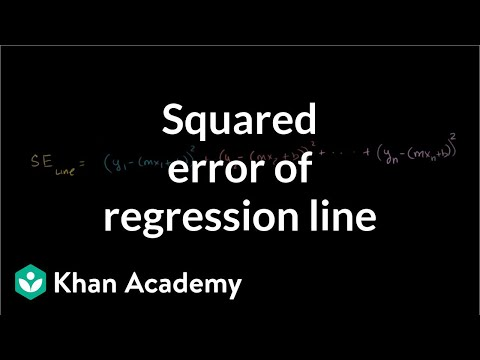

In [63]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

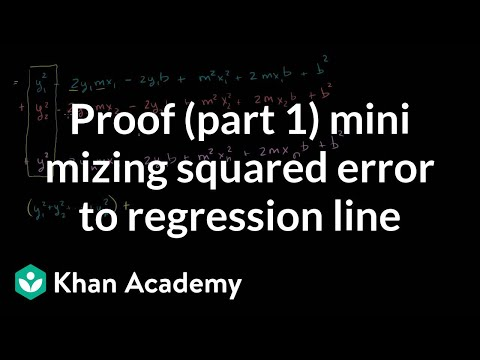

In [64]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

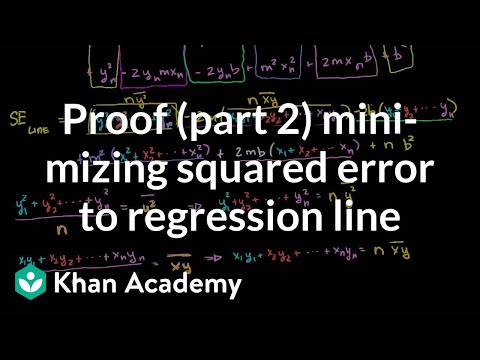

In [65]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

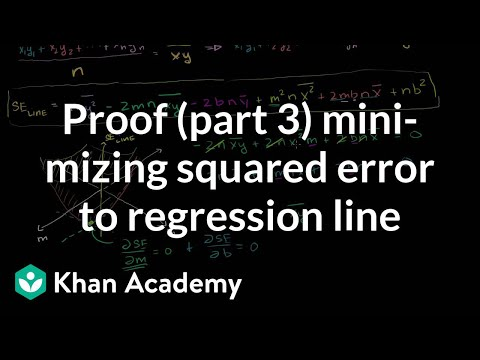

In [66]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

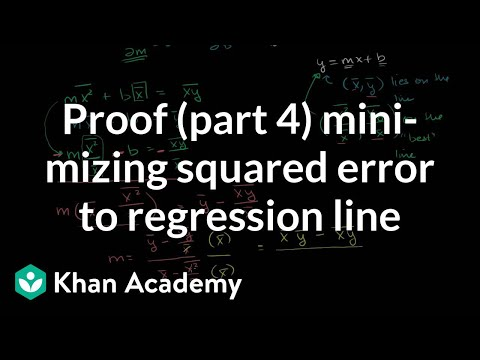

In [67]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

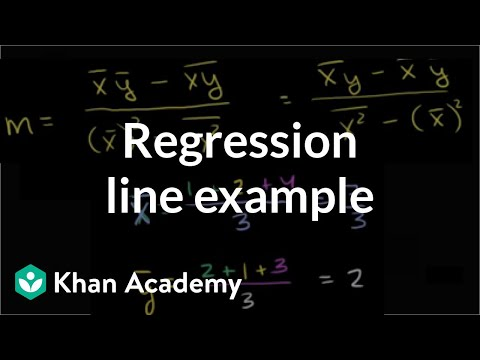

In [68]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

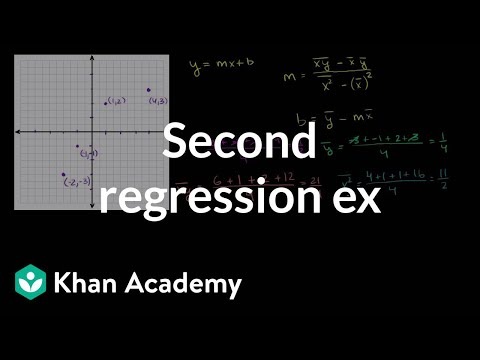

In [69]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


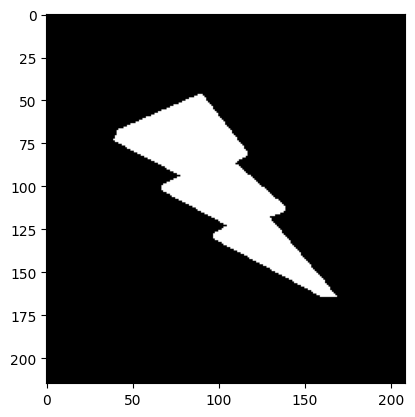

In [70]:
lightningbolt = cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
# check(1)

In [71]:
# Takes image after thresholding and finds the coordinates of all non-zero pixels (white).
# Variable 'bolt' contains NumPy array of shape (N,2) where each row is [y,x]

bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]])

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [ ]:
# TODO
# The first column holds the y-coordinates and the second holds the x-coordinates.
# To get these separately, slice the result of argwhere in this manner:
# bolt[:, 0] --> first column (y's)
# bolt[:, 1] --> second column (x's)

## Question: Why would we want to convert x and y points from int values to floats?

In [ ]:
# TODO
# If the x and y points are floats, then the precision of the values increases.
# For example, sometimes coordinates might be between pixels and not exactly
# on whole numbers. Also, all the functions (like cv2.remap() for example)
# are made to use float-based coordinates.

In [72]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float)
    #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)

    # Splits into x and y values (REMEMBER: argwhere returns [y, x])
    xs = points[:, 1] #TODO
    ys = points[:, 0] #TODO

    # Computes the means
    x_mean = np.mean(xs) #TODO
    y_mean = np.mean(ys) #TODO

    # More computation for the formula
    xy_mean = np.mean(xs * ys) #TODO
    x_squared_mean = np.mean(xs ** 2) #TODO

    # Calculates m (slope) and b (intercept) with least-squares formula
    m = (xy_mean - (x_mean * y_mean)) / (x_squared_mean - (x_mean**2)) #TODO

    b = y_mean - (m * x_mean) #TODO

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [136]:
'''
This function finds two endpoints of a regression line y = mx + b that lie within
the image's width (so x = 0 to width - 1) and have y-values that are clipped to
stay within the image. These points can be used to draw a line across the image.
'''

def find_inliers(m, b, shape):
    # Image's dimensions
    height, width = shape

    # x-values at left and right edges of image
    x1 = 0
    x2 = width - 1

    # Calculate corresponding y-values using y = mx + b
    y1 = m * x1 + b
    y2 = m * x2 + b

    # Clip y-values to stay within image height
    y1 = max(0, min(y1, height - 1))
    y2 = max(0, min(y2, height - 1))

    # Return as list of coordinates
    return [[int(x1), int(y1)], [int(x2), int(y2)]]

(146, 125)


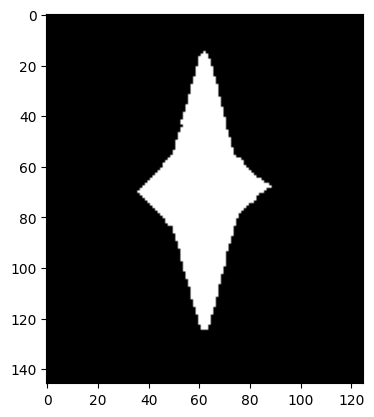

In [137]:
star = cv2.imread('squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [138]:
m,b = calculate_regression(np.argwhere(star))
inliers = find_inliers(m, b, star.shape)
inliers1 = inliers[0]
inliers2 = inliers[1]

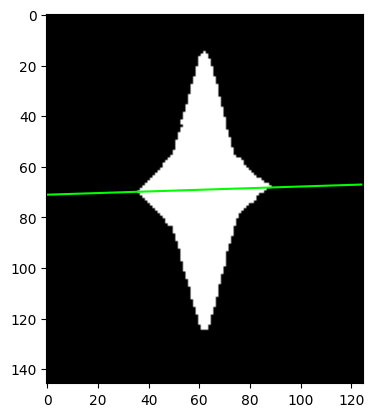

In [139]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');
regression = Line2D([inliers1[0], inliers2[0]], [inliers1[1], inliers2[1]], color='lime')
ax.add_line(regression);

## TODO

1. Run your linear regression algorithm on the following images.
2. Plot each of the results.
3. Include each result in your submitted PDF.

lightningbolt.png shape: (215, 209)


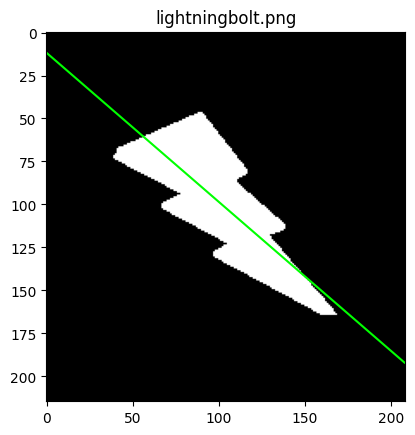

blob.png shape: (146, 125)


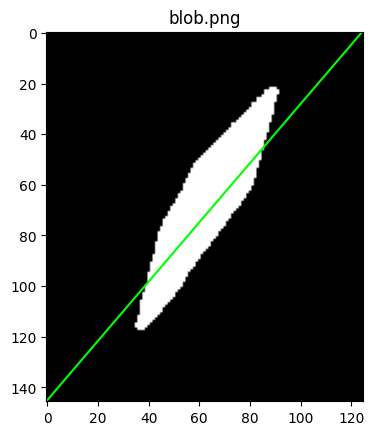

star.png shape: (146, 125)


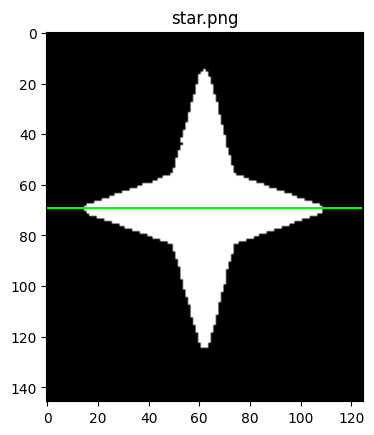

squishedstar.png shape: (146, 125)


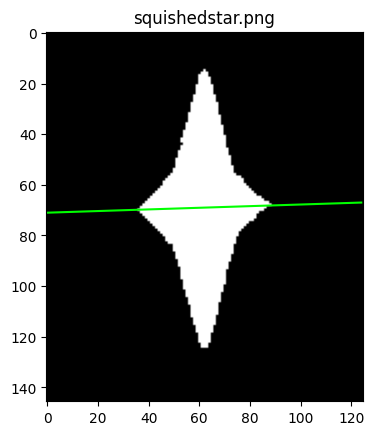

squishedturnedstar.png shape: (146, 125)


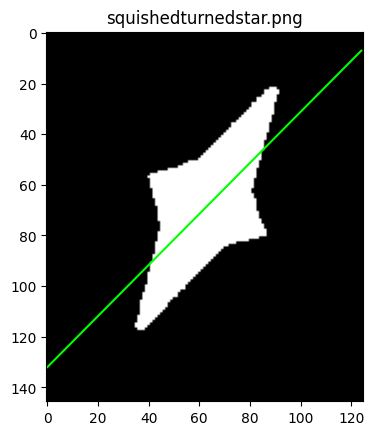

letterj.png shape: (150, 112)


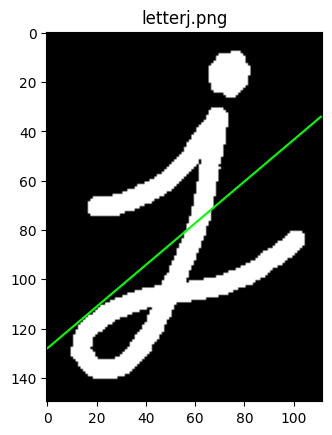

In [140]:
# File names
filenames = ['lightningbolt.png', 'blob.png', 'star.png',
             'squishedstar.png', 'squishedturnedstar.png', 'letterj.png']

# Loads the images from the filenames
images = [cv2.imread(fname, cv2.IMREAD_GRAYSCALE) for fname in filenames]

# Loops through the images and filenames together
for image, fname in zip(images, filenames):
    print(f"{fname} shape: {image.shape}")

    # Threshold the image
    _, binary = cv2.threshold(image, 125, 255, cv2.THRESH_BINARY)

    # Compute regression
    m, b = calculate_regression(np.argwhere(binary))
    inliers = find_inliers(m, b, binary.shape)
    inliers1 = inliers[0]
    inliers2 = inliers[1]

    # Plot the image and regression line
    fig, ax = plt.subplots()
    ax.imshow(binary, cmap='gray')
    regression = Line2D([inliers1[0], inliers2[0]], [inliers1[1], inliers2[1]], color='lime')
    ax.add_line(regression)
    ax.set_title(fname)
    plt.show()


## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works`

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.